In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import seaborn as sns

## EDA

In [2]:
df = pd.read_csv("data/alzheimers_prediction_dataset.csv")

In [3]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [4]:
size = df.shape[0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

No columns have any null values

Check distribution of target label

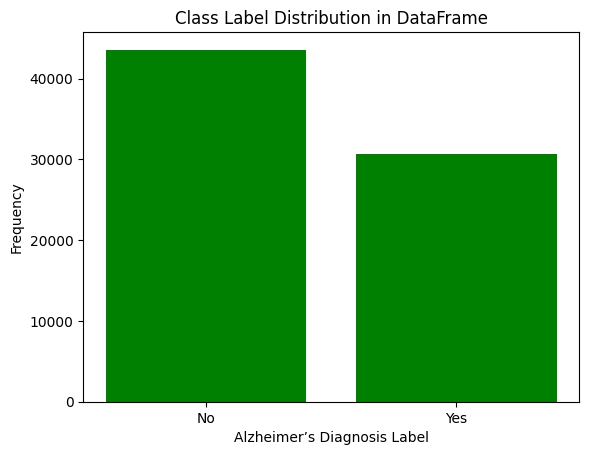

In [6]:
value_counts = df["Alzheimer’s Diagnosis"].value_counts()
label, count = list(value_counts.index), value_counts.values
plt.bar(label, count, color="green")
plt.xlabel('Alzheimer’s Diagnosis Label')
plt.ylabel('Frequency')
plt.title('Class Label Distribution in DataFrame')
plt.xticks(label)  # Set x-ticks to be the class labels
plt.show()

Need to fix balance of data

In [7]:
# run this cell if you are using scikit-learn version 1.3.X
#!pip uninstall scikit-learn --yes
#!pip install scikit-learn==1.2.2
# restart kernal after

In [8]:
from imblearn.over_sampling import RandomOverSampler # over sample to fix data
X = df.drop("Alzheimer’s Diagnosis", axis=1) 
y = df["Alzheimer’s Diagnosis"]
ros = RandomOverSampler(random_state=42)
X_sample, y_sample = ros.fit_resample(X, y)

In [9]:
print(y_sample)

0         No
1         No
2         No
3         No
4         No
        ... 
87135    Yes
87136    Yes
87137    Yes
87138    Yes
87139    Yes
Name: Alzheimer’s Diagnosis, Length: 87140, dtype: object


In [10]:
# Stitch df back together with sample values
df= pd.concat((X_sample, y_sample), axis=1)
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


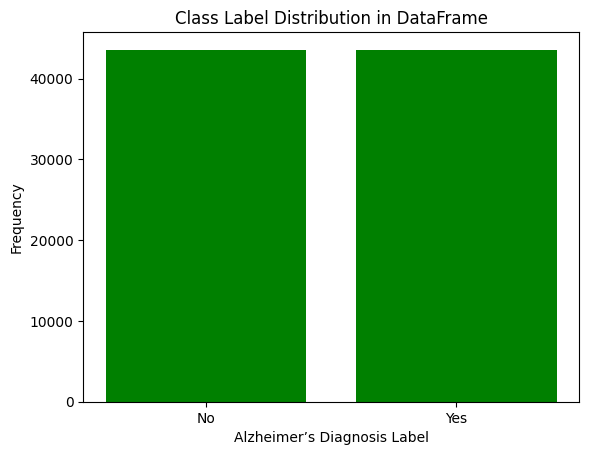

In [11]:
value_counts = df["Alzheimer’s Diagnosis"].value_counts()
label, count = list(value_counts.index), value_counts.values
plt.bar(label, count, color="green")
plt.xlabel('Alzheimer’s Diagnosis Label')
plt.ylabel('Frequency')
plt.title('Class Label Distribution in DataFrame')
plt.xticks(label)  # Set x-ticks to be the class labels
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87140 entries, 0 to 87139
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               87140 non-null  object 
 1   Age                                   87140 non-null  int64  
 2   Gender                                87140 non-null  object 
 3   Education Level                       87140 non-null  int64  
 4   BMI                                   87140 non-null  float64
 5   Physical Activity Level               87140 non-null  object 
 6   Smoking Status                        87140 non-null  object 
 7   Alcohol Consumption                   87140 non-null  object 
 8   Diabetes                              87140 non-null  object 
 9   Hypertension                          87140 non-null  object 
 10  Cholesterol Level                     87140 non-null  object 
 11  Family History 

In [13]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,87140.000000,87140.000000,87140.000000,87140.000000
mean,72.903259,9.479722,26.776125,64.643665
std,12.933662,5.753242,4.767219,20.145815
min,50.000000,0.000000,18.500000,30.000000
25%,62.000000,4.000000,22.700000,47.000000
50%,74.000000,9.000000,26.800000,65.000000
75%,84.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


Some range in values, will use standard scalar to fix this because there is no reason to not use another (not a big range, not highly skewed)

In [14]:
scaler = StandardScaler()
numerical_cols = ["Age", "Education Level", "BMI", "Cognitive Test Score"]
df_numerical = df[numerical_cols]
scaled = scaler.fit_transform(df_numerical)
df[numerical_cols] = scaled
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,8.714000e+04,8.714000e+04,8.714000e+04,8.714000e+04
mean,3.026778e-16,8.875669e-17,-1.009592e-15,2.915883e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.770836e+00,-1.647728e+00,-1.736059e+00,-1.719656e+00
25%,-8.430189e-01,-9.524636e-01,-8.550368e-01,-8.758031e-01
50%,8.479788e-02,-8.338342e-02,5.008268e-03,1.768788e-02
75%,8.579785e-01,7.856967e-01,8.650533e-01,8.615404e-01
max,1.631159e+00,1.654777e+00,1.725098e+00,1.705393e+00


In [15]:
df.describe(include="object")

,Country,Gender,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
count,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,...,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140
unique,20,2,3,3,3,2,2,2,2,3,...,3,3,3,3,2,3,3,3,2,2
top,Brazil,Female,High,Current,Never,No,No,Normal,No,Medium,...,Average,High,Unemployed,Single,No,Medium,High,Medium,Rural,No
freq,4573,43619,29176,29212,29087,69832,61185,61086,59957,29164,...,29162,29297,29080,29465,68571,29171,29124,29182,43704,43570


Country will get dropped because there are too many values to encode. This would lead to curse of dimensionality or the model creating an ordinal relationship between countries when one does not exist. Also, should not contribute to target variable. 

In [16]:
df = df.drop(columns=["Country"])

In [17]:
df.describe(include="object")

,Gender,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
count,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140,87140
unique,2,3,3,3,2,2,2,2,3,3,3,3,3,3,2,3,3,3,2,2
top,Female,High,Current,Never,No,No,Normal,No,Medium,Good,Average,High,Unemployed,Single,No,Medium,High,Medium,Rural,No
freq,43619,29176,29212,29087,69832,61185,61086,59957,29164,29488,29162,29297,29080,29465,68571,29171,29124,29182,43704,43570


All columns with only 2 or 3 values. This means one-hot encoding should work for most. However, for columns like physical activity, cholesterol, Depression, Air pollution, the labels are along the lines of low, medium, and high. This means label encoding is suitable for these columns as there is an ordinal relationship between the values. 

In [18]:
print("Unique values for:\nAlcohol Consumption: ", df["Alcohol Consumption"].unique()) # one-hot
print("Smoking Status: ", df["Smoking Status"].unique()) # one-hot
print("Depression Level: ", df["Depression Level"].unique()) # try label
print("Dietary Habits: ", df["Dietary Habits"].unique()) # one-hot
print("Employment Status: ", df["Employment Status"].unique()) # one-hot
print("Marital Status: ", df["Marital Status"].unique()) # one-hot
print("Social Engagement Level: ", df["Social Engagement Level"].unique()) # try label

Unique values for:
Alcohol Consumption:  ['Occasionally' 'Never' 'Regularly']
Smoking Status:  ['Never' 'Former' 'Current']
Depression Level:  ['Low' 'High' 'Medium']
Dietary Habits:  ['Healthy' 'Average' 'Unhealthy']
Employment Status:  ['Retired' 'Unemployed' 'Employed']
Marital Status:  ['Single' 'Widowed' 'Married']
Social Engagement Level:  ['Low' 'High' 'Medium']


In [19]:
object_cols = df.select_dtypes("object").columns.tolist()
label_enc_cols = ["Physical Activity Level", "Depression Level", "Sleep Quality",  "Air Pollution Exposure",
                 "Social Engagement Level", "Income Level", "Stress Levels"] 
one_hot_cols = list(set(object_cols) - set(label_enc_cols))
# try doing label encoding to see if it is better than one-hot for all

In [20]:
df_ohe = pd.get_dummies(df, columns=object_cols, drop_first=True)
df_ohe.head() # one hot binary values

,Age,Education Level,BMI,Cognitive Test Score,Gender_Male,Physical Activity Level_Low,Physical Activity Level_Medium,Smoking Status_Former,Smoking Status_Never,Alcohol Consumption_Occasionally,...,Marital Status_Widowed,Genetic Risk Factor (APOE-ε4 allele)_Yes,Social Engagement Level_Low,Social Engagement Level_Medium,Income Level_Low,Income Level_Medium,Stress Levels_Low,Stress Levels_Medium,Urban vs Rural Living_Urban,Alzheimer’s Diagnosis_Yes
0,1.321887,-1.473912,1.305564,1.258648,True,False,True,False,True,True,...,False,False,True,False,False,True,False,False,True,False
1,-0.069838,-0.431015,0.655286,0.017688,True,False,True,True,False,False,...,True,False,False,False,True,False,False,False,True,False
2,1.012615,1.654777,-0.813083,-1.074357,False,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
3,-1.538881,1.307145,0.927983,0.811902,True,True,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
4,-1.152291,-1.126280,0.676263,-0.776526,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [21]:
df_ohe.info() # information of new data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87140 entries, 0 to 87139
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       87140 non-null  float64
 1   Education Level                           87140 non-null  float64
 2   BMI                                       87140 non-null  float64
 3   Cognitive Test Score                      87140 non-null  float64
 4   Gender_Male                               87140 non-null  bool   
 5   Physical Activity Level_Low               87140 non-null  bool   
 6   Physical Activity Level_Medium            87140 non-null  bool   
 7   Smoking Status_Former                     87140 non-null  bool   
 8   Smoking Status_Never                      87140 non-null  bool   
 9   Alcohol Consumption_Occasionally          87140 non-null  bool   
 10  Alcohol Consumption_Regularly     

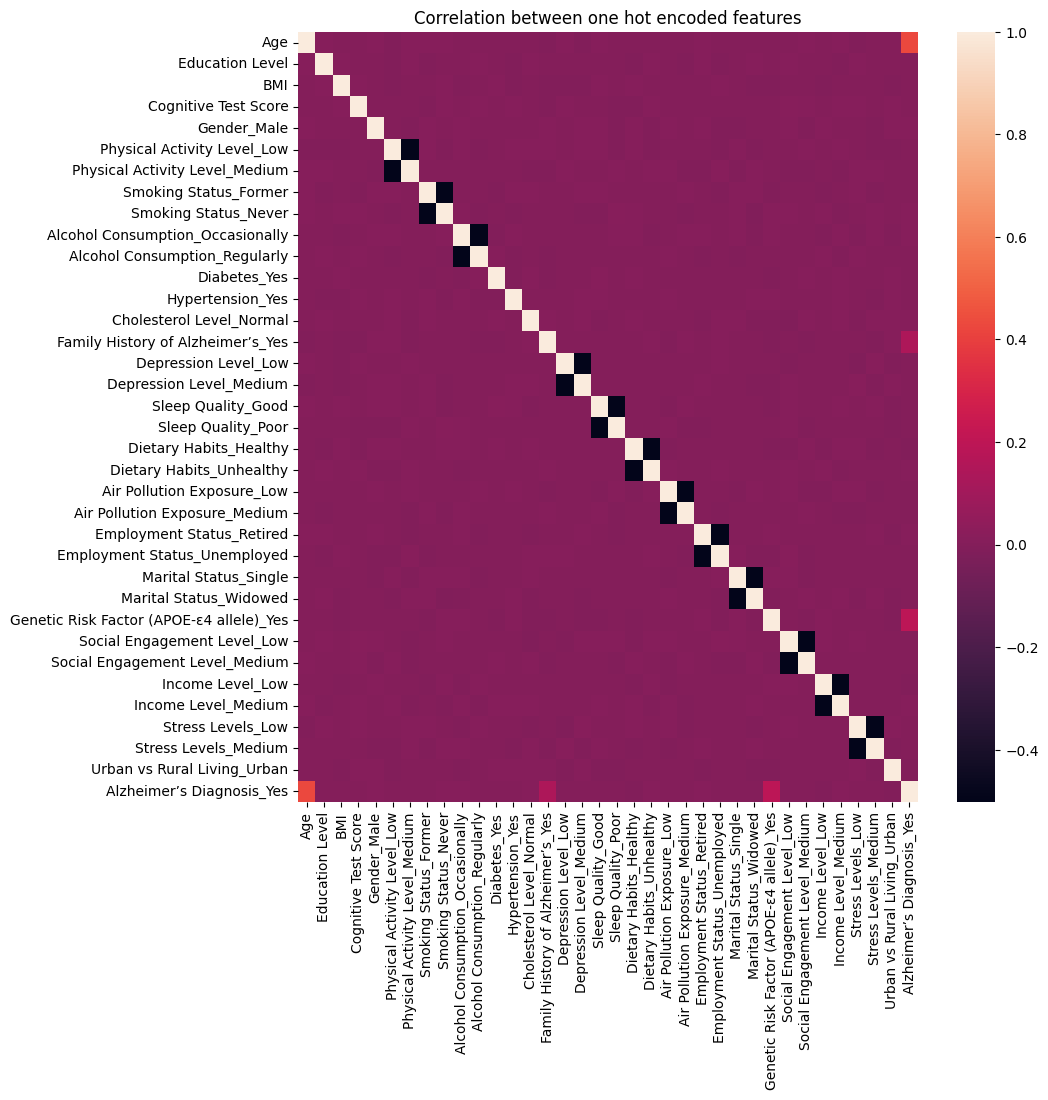

In [22]:
ohe_corr = df_ohe.corr() # heat map of correlation
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ohe_corr, ax=ax)
plt.title("Correlation between one hot encoded features")
plt.show()

In [23]:
df_label = df.copy() # new df for label encoding

In [24]:
le = LabelEncoder()
for col in label_enc_cols:
    df_label[col] = le.fit_transform(df[col])
df_label.head()

,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,1.321887,Male,-1.473912,1.305564,2,Never,Occasionally,No,No,Normal,...,Healthy,0,Retired,Single,No,1,2,0,Urban,No
1,-0.069838,Male,-0.431015,0.655286,2,Former,Never,No,No,Normal,...,Healthy,2,Unemployed,Widowed,No,0,1,0,Urban,No
2,1.012615,Female,1.654777,-0.813083,0,Current,Occasionally,No,Yes,Normal,...,Average,2,Employed,Single,No,1,2,0,Rural,No
3,-1.538881,Male,1.307145,0.927983,1,Never,Regularly,Yes,No,Normal,...,Healthy,2,Retired,Single,No,0,2,1,Rural,No
4,-1.152291,Female,-1.126280,0.676263,0,Former,Never,Yes,No,Normal,...,Unhealthy,0,Employed,Married,No,1,2,0,Rural,No


One hot rest

In [25]:
df_label= pd.get_dummies(df_label, columns=one_hot_cols, drop_first=True)
df_label.head()

,Age,Education Level,BMI,Physical Activity Level,Cognitive Test Score,Depression Level,Sleep Quality,Air Pollution Exposure,Social Engagement Level,Income Level,...,Family History of Alzheimer’s_Yes,Alzheimer’s Diagnosis_Yes,Marital Status_Single,Marital Status_Widowed,Gender_Male,Dietary Habits_Healthy,Dietary Habits_Unhealthy,Urban vs Rural Living_Urban,Genetic Risk Factor (APOE-ε4 allele)_Yes,Hypertension_Yes
0,1.321887,-1.473912,1.305564,2,1.258648,1,2,0,1,2,...,False,False,True,False,True,True,False,True,False,False
1,-0.069838,-0.431015,0.655286,2,0.017688,1,1,2,0,1,...,False,False,False,True,True,True,False,True,False,False
2,1.012615,1.654777,-0.813083,0,-1.074357,0,1,2,1,2,...,False,False,True,False,False,False,False,False,False,True
3,-1.538881,1.307145,0.927983,1,0.811902,2,0,2,0,2,...,False,False,True,False,True,True,False,False,False,False
4,-1.152291,-1.126280,0.676263,0,-0.776526,0,2,0,1,2,...,False,False,False,False,False,False,True,False,False,False


In [26]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87140 entries, 0 to 87139
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       87140 non-null  float64
 1   Education Level                           87140 non-null  float64
 2   BMI                                       87140 non-null  float64
 3   Physical Activity Level                   87140 non-null  int64  
 4   Cognitive Test Score                      87140 non-null  float64
 5   Depression Level                          87140 non-null  int64  
 6   Sleep Quality                             87140 non-null  int64  
 7   Air Pollution Exposure                    87140 non-null  int64  
 8   Social Engagement Level                   87140 non-null  int64  
 9   Income Level                              87140 non-null  int64  
 10  Stress Levels                     

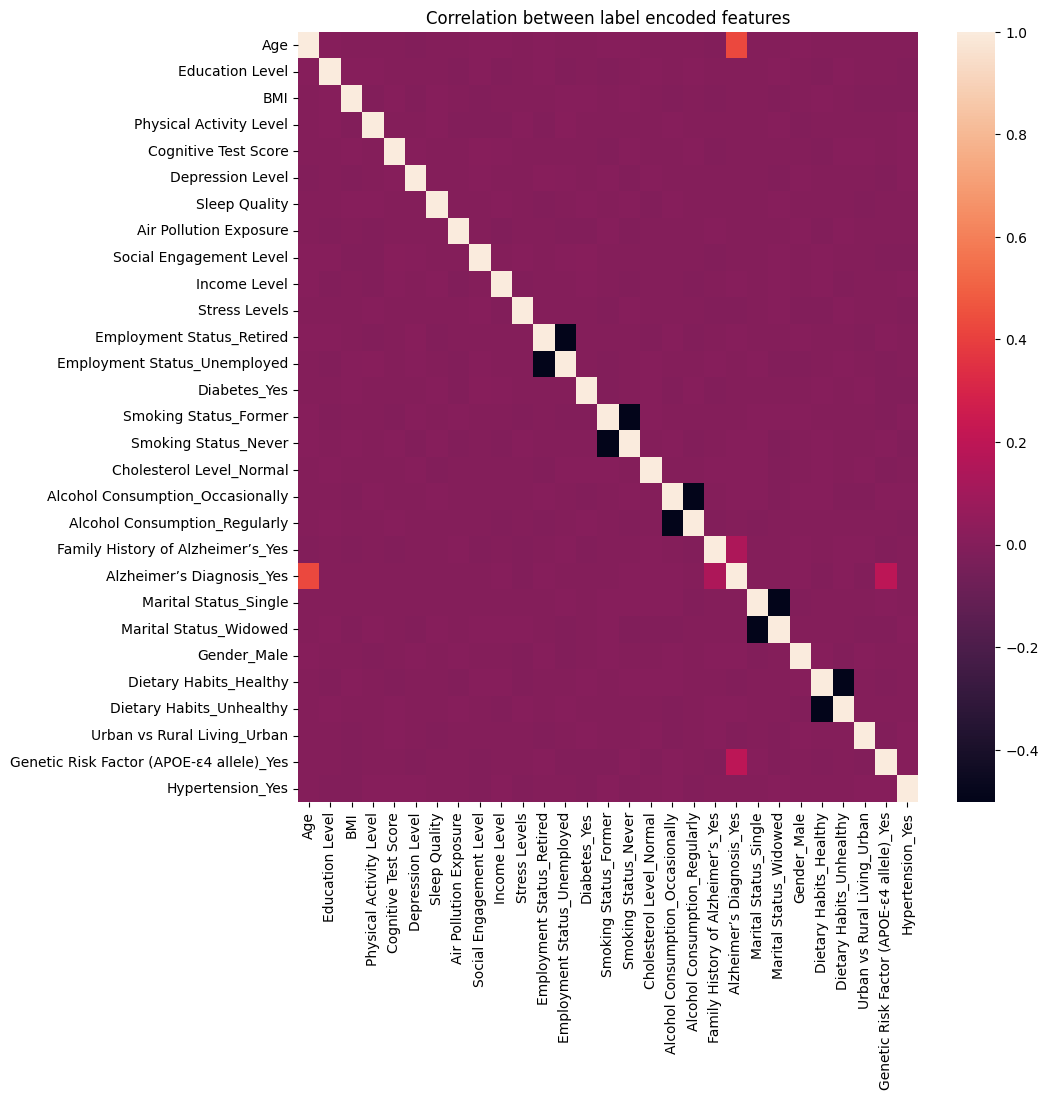

In [27]:
label_corr = df_label.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(label_corr, ax=ax)
plt.title("Correlation between label encoded features")
plt.show()

There is some correlation between features, but it is usually between features like Physical Activity_Low and Physical Activity_Medium. I do not think it is worth removing these features as it could negatively impact the result. The correlation between these features is greater than -0.4 (close to 0). There are no other features correlated closely. However, there is some correlation between Age and the target variable. This should be monitored when evaluating the model.

## Dataset/Dataloader Creation

In [28]:
from torchvision import datasets, transforms
import torch
from torch.utils.data import Dataset, DataLoader
class BinaryDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data.values, dtype=torch.float32)  # Convert to tensor
        self.labels = torch.tensor(labels.values, dtype=torch.float32)  # Convert to tensor

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

Begin with one hot encoded dataset

In [29]:
X_ohe = df_ohe.drop("Alzheimer’s Diagnosis_Yes", axis=1).astype("float64")
y_ohe = df_ohe["Alzheimer’s Diagnosis_Yes"]

In [30]:
from sklearn.model_selection import train_test_split

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)

In [31]:
print(X_train_ohe.shape)
print(y_train_ohe.shape)
print(X_test_ohe.shape)
print(y_test_ohe.shape)

(69712, 35)
(69712,)
(17428, 35)
(17428,)


In [32]:
print(y_train_ohe.value_counts())
print(y_test_ohe.value_counts())

Alzheimer’s Diagnosis_Yes
False    34880
True     34832
Name: count, dtype: int64
Alzheimer’s Diagnosis_Yes
True     8738
False    8690
Name: count, dtype: int64


In [33]:
ohe_train_dataset = BinaryDataset(X_train_ohe, y_train_ohe)
ohe_test_dataset = BinaryDataset(X_test_ohe, y_test_ohe)

In [34]:
ohe_train_dataset

Create DataLoader

In [35]:
batch_size=64
ohe_train_loader = DataLoader(ohe_train_dataset, batch_size=batch_size, shuffle=True)
ohe_test_loader = DataLoader(ohe_test_dataset, batch_size=batch_size, shuffle=False)

Create binary MLP class

In [36]:
import torch
import torch.nn as nn

class BinaryMLP(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.bn3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out  # shape (batch_size, 1)

In [37]:
model_ohe = BinaryMLP(35)
print(model_ohe)

BinaryMLP(
  (fc1): Linear(in_features=35, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Training loop

In [38]:
# Training Loop for PyTorch Model
# Taken from Lecture03_MLP and Lecture09_CNN_RGB_Tensorboard in class repository

def train(model, loss_fn, optimizer, train_loader, batch_size=64, epochs=5, threshold=0.5):
    """
    A function to train a PyTorch model.
    It teaches the model to predict answers correctly by repeatedly learning from mistakes.
    
    Args:
    - model: The machine learning model to be trained.
    - loss_fn: The function that calculates how wrong the model's predictions are (loss function).
    - optimizer: The helper that adjusts the model to improve predictions (optimizer).
    - batch_size: How many examples to process at a time (default is 64).
    - epochs: How many rounds of learning the model will go through (default is 5).
    """
    
    model.train()  # Set the model to 'training mode' so it can learn and improve.

    for epoch in range(epochs):  # Loop through each learning round (epoch).
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

            # Track training loss & accuracy
            running_loss += loss.item()
            preds = np.array((outputs.squeeze().cpu() >= threshold)).astype(int)
            correct_train += (torch.tensor(preds).to(device) == labels).sum().item()
            total_train += labels.size(0)

        # Compute epoch loss & accuracy
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        
        # Print how much the model improved in this round.
        print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.4f}")

In [39]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
model_ohe.to(device)
print(f"Using {device} device")

Using mps device


Hyperparameters and Train

In [40]:
lr = 0.01
epochs = 40
loss_fn = nn.BCELoss()  
optimizer = torch.optim.Adam(model_ohe.parameters())

train = train(model_ohe, loss_fn, optimizer, ohe_train_loader, batch_size, epochs)

/var/folders/6r/r995k05d1tl4vmbh4_nk26p00000gn/T/ipykernel_75465/59411608.py:34: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  preds = np.array((outputs.squeeze().cpu() >= threshold)).astype(int)


Epoch [1/40] - Train Loss: 0.5647 - Train Acc: 0.7136
Epoch [2/40] - Train Loss: 0.5544 - Train Acc: 0.7215
Epoch [3/40] - Train Loss: 0.5499 - Train Acc: 0.7219
Epoch [4/40] - Train Loss: 0.5469 - Train Acc: 0.7250
Epoch [5/40] - Train Loss: 0.5431 - Train Acc: 0.7275
Epoch [6/40] - Train Loss: 0.5369 - Train Acc: 0.7298
Epoch [7/40] - Train Loss: 0.5314 - Train Acc: 0.7326
Epoch [8/40] - Train Loss: 0.5230 - Train Acc: 0.7387
Epoch [9/40] - Train Loss: 0.5117 - Train Acc: 0.7452
Epoch [10/40] - Train Loss: 0.5005 - Train Acc: 0.7531
Epoch [11/40] - Train Loss: 0.4851 - Train Acc: 0.7618
Epoch [12/40] - Train Loss: 0.4697 - Train Acc: 0.7725
Epoch [13/40] - Train Loss: 0.4506 - Train Acc: 0.7853
Epoch [14/40] - Train Loss: 0.4322 - Train Acc: 0.7963
Epoch [15/40] - Train Loss: 0.4142 - Train Acc: 0.8089
Epoch [16/40] - Train Loss: 0.3952 - Train Acc: 0.8194
Epoch [17/40] - Train Loss: 0.3749 - Train Acc: 0.8294
Epoch [18/40] - Train Loss: 0.3597 - Train Acc: 0.8382
Epoch [19/40] - Tra

Inference

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [42]:
# function for seeing the model's accuracy on the test set
def test(model, test_loader, threshold=0.5):
    # Running inference
    model.eval()  # Set the model to evaluation mode (disables dropout, etc.)
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []


    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to device
            outputs = model(inputs)
            preds = (outputs.squeeze().cpu().numpy() >= threshold).astype(int)  # Move to CPU for numpy
            total += labels.size(0)
            correct += (preds == labels.cpu().numpy()).sum().item()  # Move labels to CPU
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(preds)


    accuracy = correct / total * 100
    print(f"Accuracy: {accuracy:.2f}%")
    
    cm = confusion_matrix(all_labels, all_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(2)))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

Accuracy: 73.66%


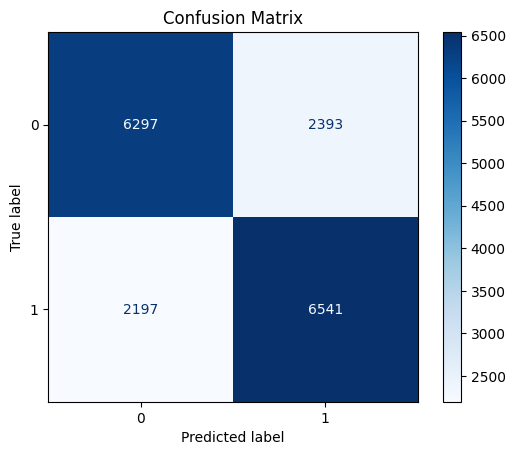

In [43]:
test(model_ohe, ohe_test_loader)

In [44]:
torch.save(model_ohe.state_dict(), "one_hot_model.pth")
print("Final model saved.")

Final model saved.


Label Encoded Dataset

In [45]:
X_label = df_label.drop("Alzheimer’s Diagnosis_Yes", axis=1).astype("float64")
y_label = df_label["Alzheimer’s Diagnosis_Yes"]

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

label_train_dataset = BinaryDataset(X_train_label, y_train_label)
label_test_dataset = BinaryDataset(X_test_label, y_test_label)

label_train_loader = DataLoader(label_train_dataset, batch_size=batch_size, shuffle=True)
label_test_loader = DataLoader(label_test_dataset, batch_size=batch_size, shuffle=False)

model_label = BinaryMLP(X_label.shape[1])
print(model_label)

BinaryMLP(
  (fc1): Linear(in_features=28, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [46]:
lr = 0.01
epochs = 20
loss_fn = nn.BCELoss()  
optimizer = torch.optim.Adam(model_label.parameters())

train_label = train(model_label, loss_fn, optimizer, label_train_loader, batch_size=batch_size, epochs=epochs)

TypeError: 'NoneType' object is not callable

In [ ]:
test(model_label, label_test_loader)

In [ ]:
torch.save(model_label.state_dict(), "label_encoded_model.pth")
print("Final model saved.")